#Correlação e Regressão Simples/Multivariada
##Desafio Final
Ludmylla Martins Caetano -- Squad Rita Levi-Montalcini

In [ ]:
#Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

##Considerando a base de dados kc_house_data.csv:

In [ ]:
#Base de dados
df_house = pd.read_csv("kc_house_data.csv")
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3222049055,20150116T000000,650000.0,3,1.75,2800,19386,1.0,y,4,...,8,1400,1400,1965,0,98198,47.3554,-122.324,3270,31450
9995,7352200100,20150224T000000,1360000.0,2,1.75,2620,14138,2.0,y,4,...,8,2120,500,1931,1991,98125,47.7142,-122.277,1830,8279
9996,3124059023,20150213T000000,1960000.0,3,1.75,3330,12566,1.0,y,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
9997,7352200025,20141013T000000,1190000.0,2,1.75,2080,8112,1.0,y,4,...,8,1040,1040,1939,1984,98125,47.7134,-122.277,2030,8408


In [ ]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.549550e+09,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
std,2.863859e+09,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.114001e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,3.905010e+09,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,7.272001e+09,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

### 1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número dequartos bedrooms? Existe alguma diferença na correlação quandoconsideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

In [ ]:
# Correlação

num_df_house = df_house.select_dtypes(include=['float64', 'int64'])
correlation = num_df_house.corr()

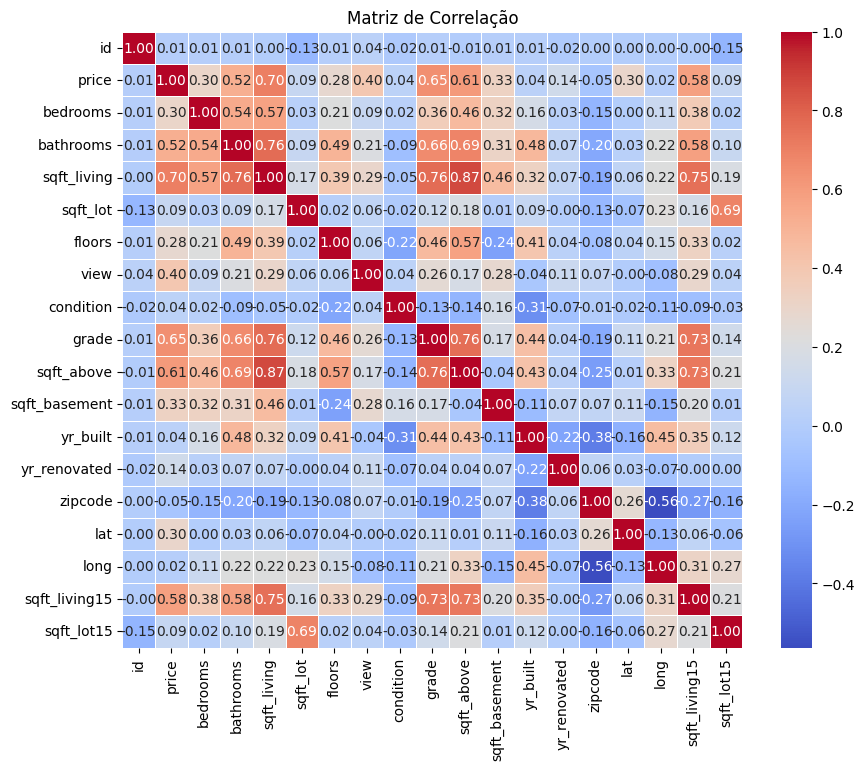

In [ ]:
# Matriz de correlação

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Pela matriz de correlação, tem-se que a correlação entre price e bedrooms é de 0.30

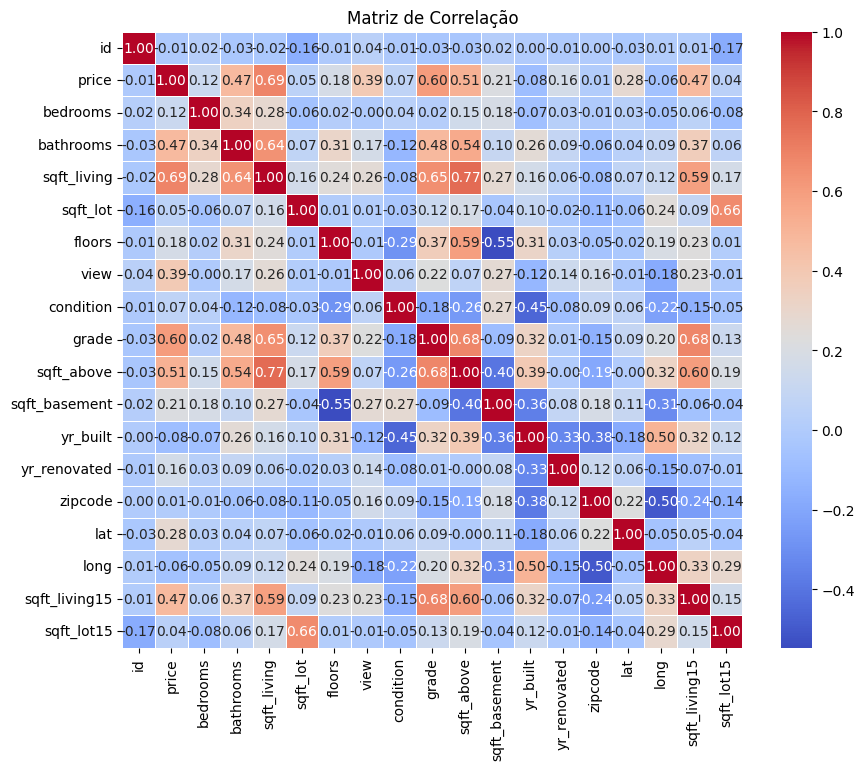

In [ ]:
#Correlação
df_house_sqft = num_df_house[num_df_house['sqft_living'] > 2000]
correlation = df_house_sqft.corr()

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Considerando apenas casas com uma área total sqft_living superior a 2000 pés quadrados a correlação entre 'price' e 'bedrooms' muda para 0.12.

###2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?

In [ ]:
#Correlação
df_house_dois_banheiros = num_df_house[num_df_house['bathrooms'] >= 2]
correlation = df_house_dois_banheiros['sqft_living'].corr(df_house_dois_banheiros['price'])
correlation

0.7067107107996192

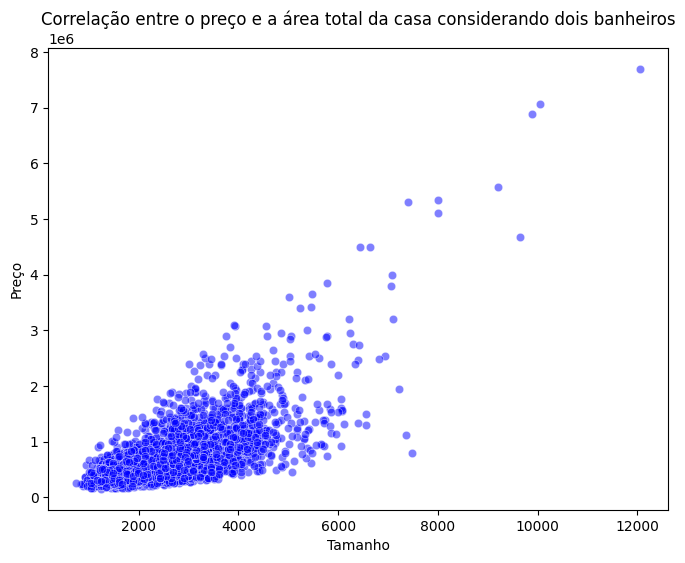

In [ ]:
## gerando o gráfico da reta estimada

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_house_dois_banheiros, x='sqft_living', y='price', color='blue', alpha=0.5)

# definindo titulos
plt.title('Correlação entre o preço e a área total da casa considerando dois banheiros')
plt.xlabel('Tamanho')
plt.ylabel('Preço')

plt.show()

Há uma correlação positiva, 0.7, entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms.

###3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?

In [ ]:
correlation1 = df_house['bathrooms'].corr(df_house['sqft_living'])
correlation2 = df_house['bathrooms'].corr(df_house['price'])

print("Correlação entre banheiros e tamanho da casa: ", correlation1)
print("Correlação entre banheiros e o preço: ", correlation2)

Correlação entre banheiros e tamanho da casa:  0.7648101246651208
Correlação entre banheiros e o preço:  0.5211927985047573


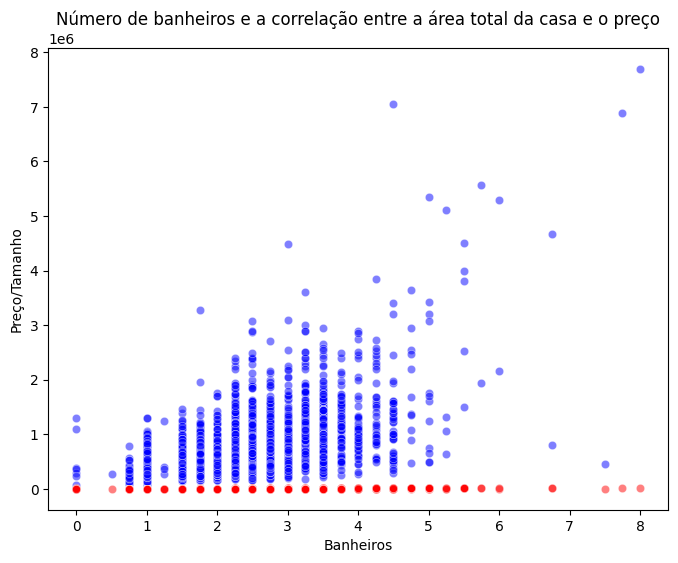

In [ ]:
## scatterplot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_house, x='bathrooms', y='price', color='blue', alpha=0.5)
sns.scatterplot(data=df_house, x='bathrooms', y='sqft_living', color='red', alpha=0.5)

# definindo titulos
plt.title('Número de banheiros e a correlação entre a área total da casa e o preço')
plt.xlabel('Banheiros')
plt.ylabel('Preço/Tamanho')

plt.show()

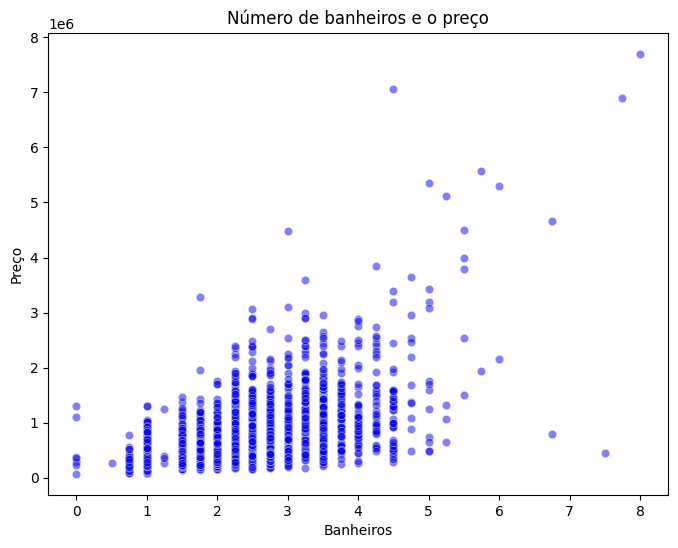

In [ ]:
## scatterplot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_house, x='bathrooms', y='price', color='blue', alpha=0.5)

# definindo titulos
plt.title('Número de banheiros e o preço')
plt.xlabel('Banheiros')
plt.ylabel('Preço')

plt.show()

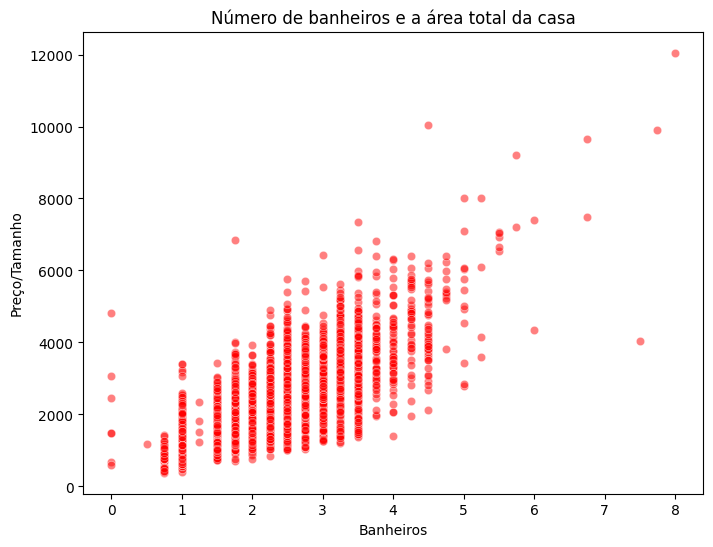

In [ ]:
## scatterplot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_house, x='bathrooms', y='sqft_living', color='red', alpha=0.5)

# definindo titulos
plt.title('Número de banheiros e a área total da casa')
plt.xlabel('Banheiros')
plt.ylabel('Preço/Tamanho')

plt.show()

###4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?

In [ ]:
df_house_sqft3000 = num_df_house[num_df_house['sqft_living'] > 3000]
correlation = df_house_sqft3000['condition'].corr(df_house_sqft3000['price'])

print("A correlação entre a condição da casa e o preço é de", correlation)

A correlação entre a condição da casa e o preço é de 0.10527844723732609


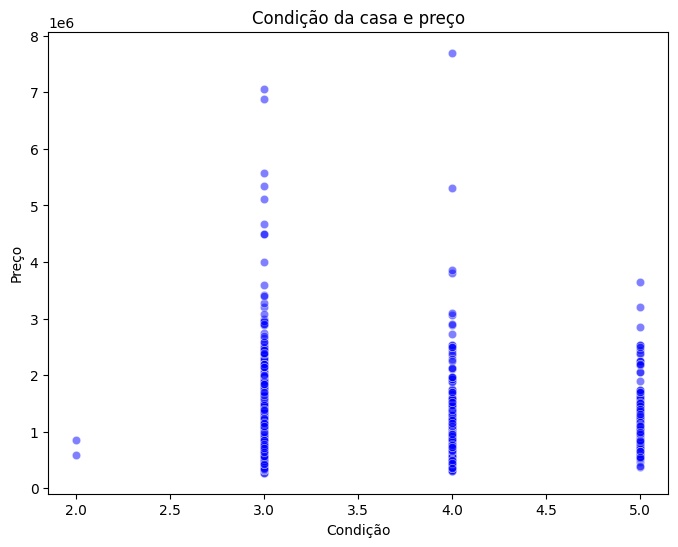

In [ ]:
## scatterplot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_house_sqft3000, x='condition', y='price', color='blue', alpha=0.5)

# definindo titulos
plt.title('Condição da casa e preço')
plt.xlabel('Condição')
plt.ylabel('Preço')

plt.show()

###5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

In [ ]:
df_house_3_quartos = df_house[df_house['bedrooms'] >= 3]
correlation = df_house_3_quartos['lat'].corr(df_house_3_quartos['price'])
print("A correlação entre a localização geográfica e o preço das casas com pelo menos 3 quartos é de", correlation)

A correlação entre a localização geográfica e o preço das casas com pelo menos 3 quartos é de 0.31255514248432165


A correlação é neutra/moderada, já que o valor está mais próximo de zero que de 1.

###6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.

In [ ]:
# Relação entre waterfront e price
# Agrupando a variável categórica em categorias
groups = [df_house['price'][df_house['waterfront'] == i] for i in df_house['waterfront'].unique()]

# Executando o ANOVA
anova = f_oneway(*groups)

# Comparando o nível de significância de 0.05
if (anova[1]>0.05):
  print("Pode se considerar que há correlação entre as variáveis.")
else:
  print("Não há correlação entre as variáveis.")

anova

Não há correlação entre as variáveis.


F_onewayResult(statistic=964.5733248785583, pvalue=2.97380815121432e-202)

Pelo teste ANOVA, não há correlação entre a presença ou não de Waterfront e o preço da casa.

##Considerando a base de dados car_price.csv

7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e
dê exemplos de correlações positivas, negativas e neutras.
8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price.
9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.
10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.
11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão
e exiba o gráfico dos resíduos do modelo.

In [ ]:
#Base de dados
df_car = pd.read_csv("car_price.csv")
df_car

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,5.0,43.0
1870,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
1871,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
1872,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0


In [ ]:
df_car.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

As variáveis são majoritariamente categóricas.

###7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

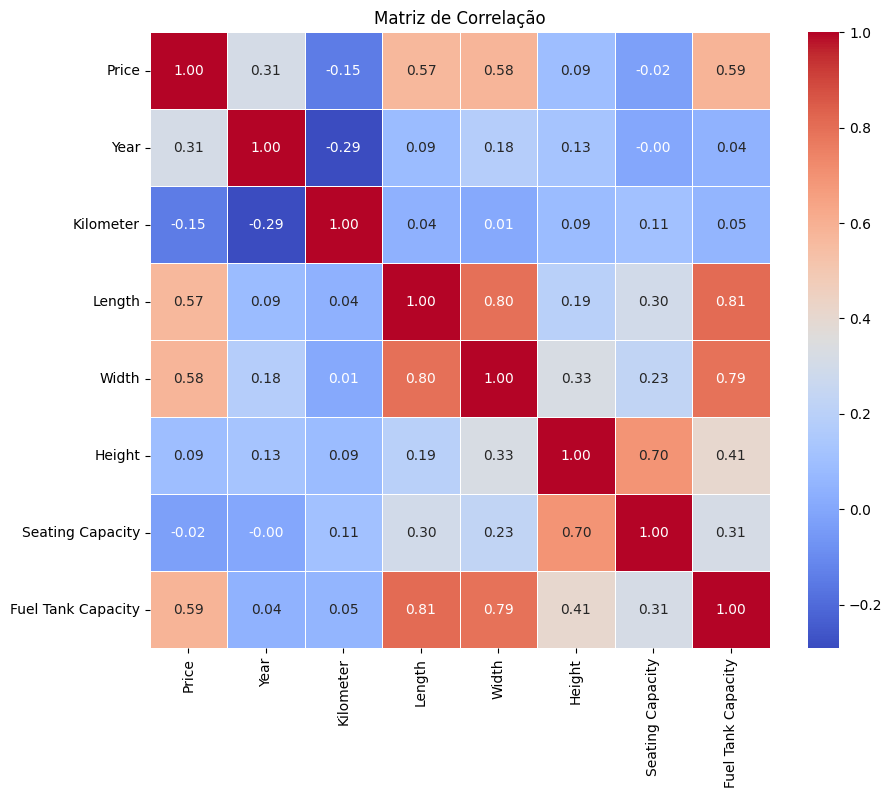

In [ ]:
# Correlação

num_df_car = df_car.select_dtypes(include=['float64', 'int64'])
correlation = num_df_car.corr()

# Matriz de correlação

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Considerando:
* Correlação Positiva: valores próximos a 1;
* Correlação Negativa: valores próximos a -1;
* Correlação Neutra: valores próximos a 0.

Tem-se:
* Correlação Positiva: Correlação entre 'Length' e 'Width'.
* Correlação Negativa: Correlação entre 'Kilometer' e 'Year'.
* Correlação Neutra: Correlação entre 'Year' e 'Fuel Tank Capacity'.

###8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.

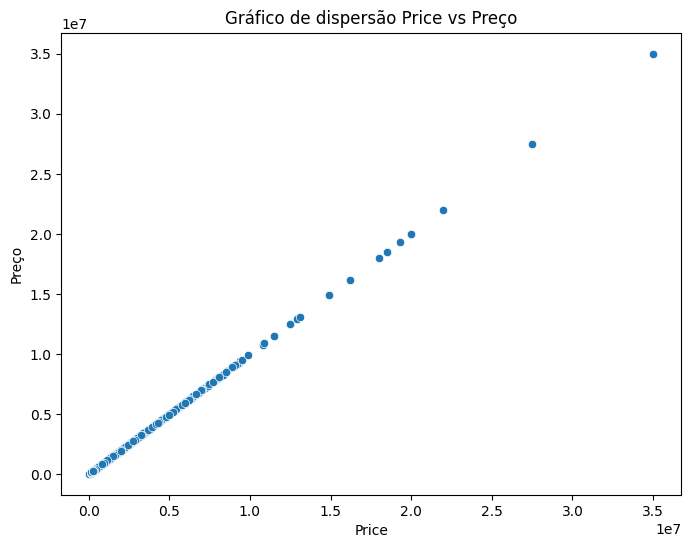

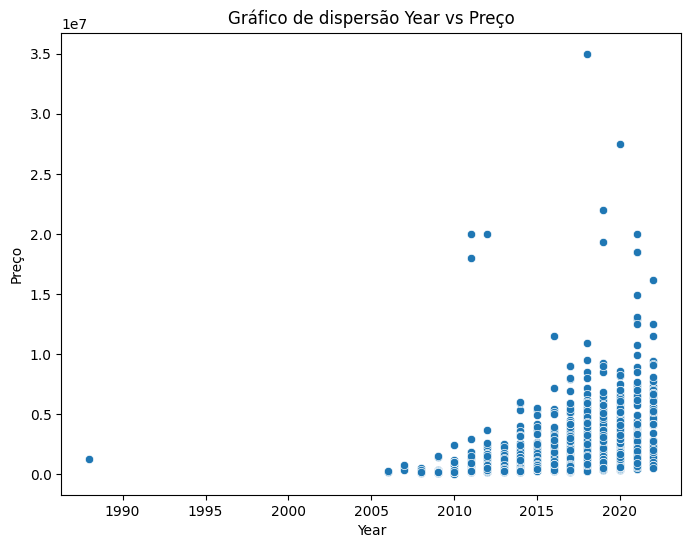

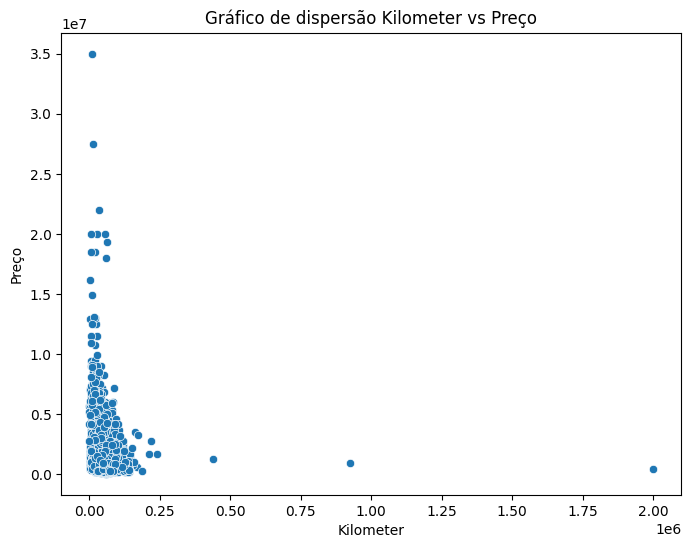

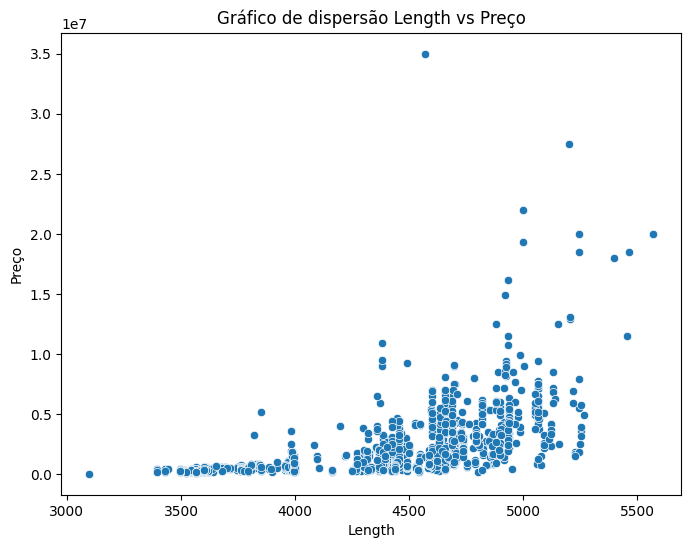

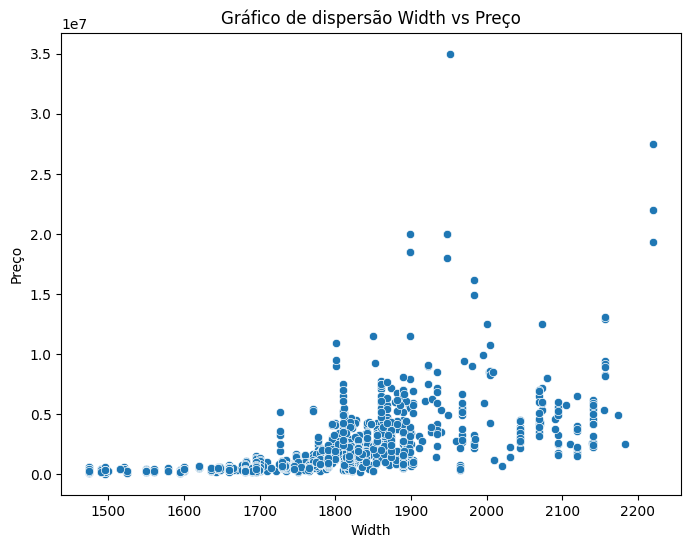

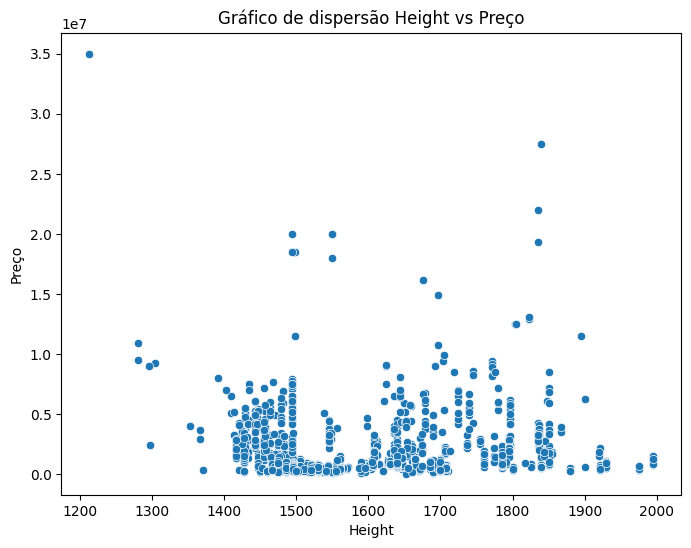

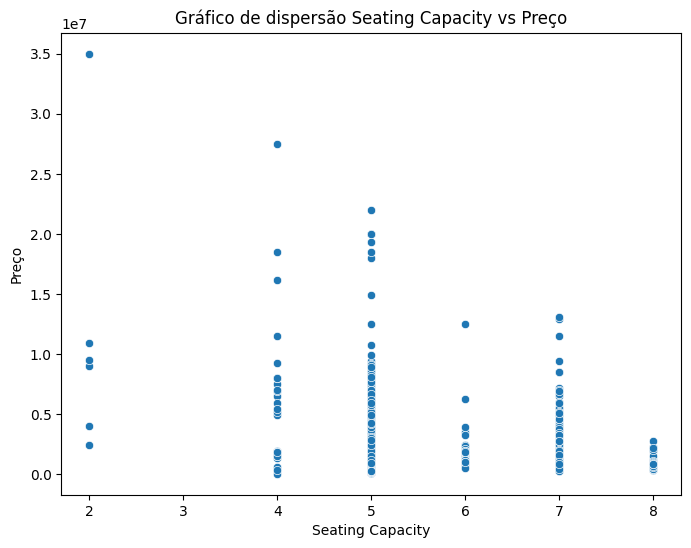

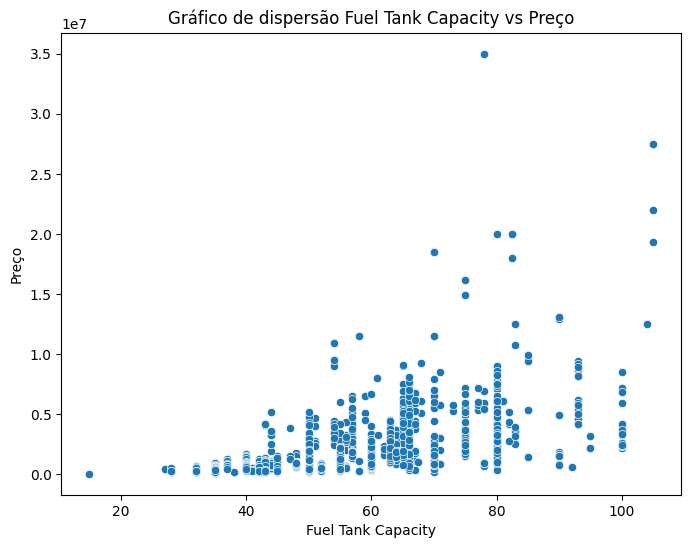

In [ ]:
### iterando em todas as colunas numéricas
for column in num_df_car.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=num_df_car, x=column, y="Price")
    plt.title(f'Gráfico de dispersão {column} vs Preço')
    plt.xlabel(column)
    plt.ylabel("Preço")
    plt.show()

###9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

In [ ]:
num_df_car = df_car.select_dtypes(include=['float64', 'int64'])
num_df_car

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,3990.0,1680.0,1505.0,5.0,35.0
1,450000,2014,75000,3995.0,1695.0,1555.0,5.0,42.0
2,220000,2011,67000,3585.0,1595.0,1550.0,5.0,35.0
3,799000,2019,37500,3995.0,1745.0,1510.0,5.0,37.0
4,1950000,2018,69000,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...
1869,245000,2014,79000,3775.0,1680.0,1620.0,5.0,43.0
1870,850000,2016,90300,4585.0,1890.0,1785.0,7.0,70.0
1871,275000,2014,83000,3495.0,1550.0,1500.0,5.0,32.0
1872,240000,2013,73000,3795.0,1680.0,1427.0,5.0,45.0


In [ ]:
### define a variável explicativa e adiciona uma constante
X = sm.add_constant(num_df_car['Kilometer'])

### define a variável de interesse
y = num_df_car['Price']

# Fit do modelo: aqui o python ira calcular os valores de intercepto e coeficiente angular estimados
model = sm.OLS(y, X).fit()

## gera a tabela de regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     41.50
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.49e-10
Time:                        23:17:33   Log-Likelihood:                -30189.
No. Observations:                1874   AIC:                         6.038e+04
Df Residuals:                    1872   BIC:                         6.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.041e+06   7.48e+04     27.302      0.0

O modelo gerado foi:
$$Preço = 2.041 \times 10^{6} - 6.0778 × Kilometer$$

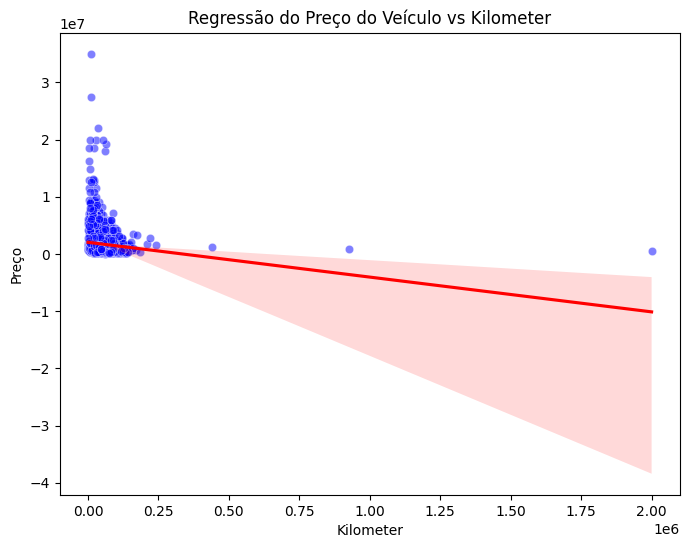

In [ ]:
## gerando o gráfico da reta estimada

plt.figure(figsize=(8, 6))
sns.scatterplot(data=num_df_car, x='Kilometer', y='Price', color='blue', alpha=0.5)

# a funcao regplot gera a regressao e a plot da reta
sns.regplot(data=num_df_car, x='Kilometer', y='Price', scatter=False, color='red')

# definindo titulos
plt.title('Regressão do Preço do Veículo vs Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Preço')

plt.show()

###10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

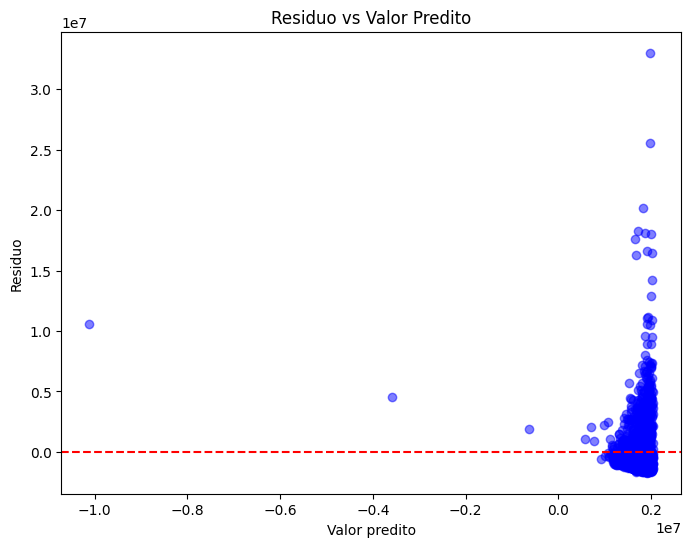

In [ ]:
residuals = model.resid
predicted_values = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='blue', alpha=0.5)

# adiciona linha
plt.axhline(y=0, color='red', linestyle='--')

# titulos
plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()

Os pontos estão concentrados em um valor.

###11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [ ]:
corr = num_df_car.corr()

### seleciona variáveis com correlacao elevada
high_correlation_variables = corr[(corr['Price'] > 0.5) | (corr['Price'] < -0.5)].index.tolist()
high_correlation_variables.remove('Price')

# variáveis selecionadas
selected_variables = ['Price'] + high_correlation_variables
selected_df = num_df_car[selected_variables]

In [ ]:
# Fit do modelo
X = sm.add_constant(selected_df.drop(columns=['Price']))
y = selected_df['Price']
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     391.4
Date:                Thu, 09 May 2024   Prob (F-statistic):          2.79e-197
Time:                        23:34:33   Log-Likelihood:                -29753.
No. Observations:                1874   AIC:                         5.951e+04
Df Residuals:                    1870   BIC:                         5.954e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -1.21e+07   8.16

Modelo Estimado:
$$Preço = -1.21 \times 10^{7} +934.3038Length + 4300.1423 Width + 4.252 \times 10^{4} FuelTankCapacity$$

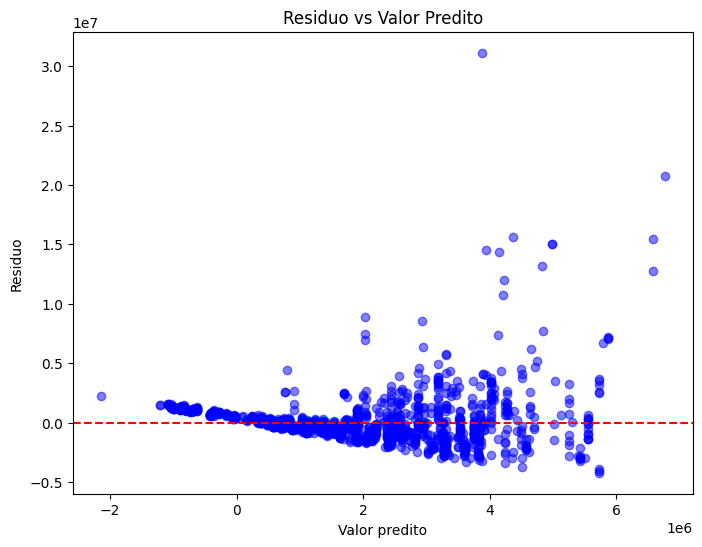

In [ ]:
# Análise dos resíduos
# salva o dado do resíduo
residuals = model.resid
# calcula ovalor predito
predicted_values = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, color='blue', alpha=0.5)

# adiciona linha
plt.axhline(y=0, color='red', linestyle='--')

# titulos
plt.title('Residuo vs Valor Predito')
plt.xlabel('Valor predito')
plt.ylabel('Residuo')

plt.show()